In [ ]:
# ======================================================================
#   MAT 531 – Multivariable Mathematics for Machine Learning
#   Linear Regression Lab
#
#   Title: Fitting Linear, Quadratic, and Exponential Models
#   Student: Nikita S. Karim
#   Instructor: Professor Rocca
#   Fall 2025
# ======================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import linalg as la
from scipy.optimize import curve_fit

In [3]:
# Study hours (x) and exam scores (y)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
scores = np.array([50, 55, 60, 62, 68, 72, 75, 78, 82, 88], dtype=float)

# Put into a DataFrame just to look at it nicely
df = pd.DataFrame({
    "Hours_Studied": hours,
    "Exam_Score": scores
})

df

,Hours_Studied,Exam_Score
0,1.0,50.0
1,2.0,55.0
2,3.0,60.0
3,4.0,62.0
4,5.0,68.0
5,6.0,72.0
6,7.0,75.0
7,8.0,78.0
8,9.0,82.0
9,10.0,88.0


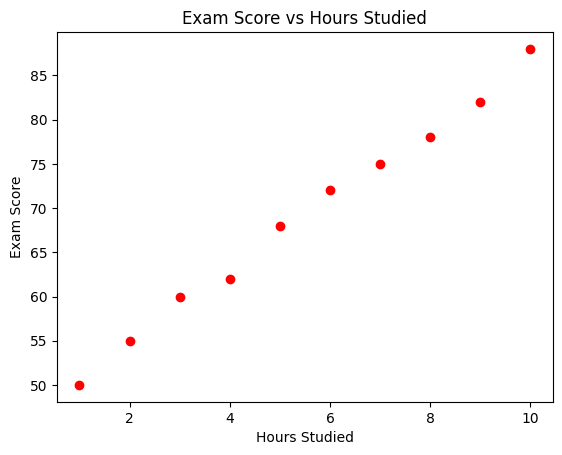

In [4]:
fig, ax = plt.subplots()
ax.plot(hours, scores, "ro")  # red dots
ax.set_title("Exam Score vs Hours Studied")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Exam Score")
plt.show()

In [ ]:
# Linear model: y = a*x + b
def model_linear(x, a, b):
    return ax + b

# Quadratic model: y = a*x^2 + b*x + c
def model_quad(x, a, b, c):
    return a*x**2 + b*x + c

# Exponential model: y = b * e^(a*x)
def model_exp(x, a, b):
    return b * np.exp(a*x)

In [6]:
# Use SciPy curve_fit to get best fit parameters

# Linear fit
lin_coeffs, lin_cov = curve_fit(model_linear, hours, scores)

# Quadratic fit
quad_coeffs, quad_cov = curve_fit(model_quad, hours, scores)

# Exponential fit
exp_coeffs, exp_cov = curve_fit(model_exp, hours, scores)

lin_coeffs, quad_coeffs, exp_coeffs

(array([ 4.02424242, 46.86666667]),
 array([-2.65151515e-02,  4.31590909e+00,  4.62833333e+01]),
 array([ 0.05790031, 49.50324905]))

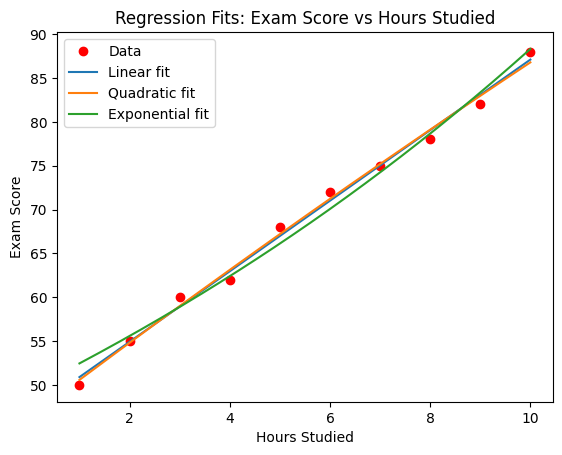

In [ ]:
# Create a smooth range of x values for plotting the curves
x_plot = np.linspace(hours.min(), hours.max(), 200)

# Compute the fitted curves
y_lin  = model_linear(x_plot, *lin_coeffs)
y_quad = model_quad(x_plot, *quad_coeffs)
y_exp  = model_exp(x_plot, *exp_coeffs)

# Plot everything
fig, ax = plt.subplots()
ax.plot(hours, scores, "ro", label="Data")          # original data points
ax.plot(x_plot, y_lin,  label="Linear fit")
ax.plot(x_plot, y_quad, label="Quadratic fit")
ax.plot(x_plot, y_exp,  label="Exponential fit")

ax.set_title("Regression Fits: Exam Score vs Hours Studied")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Exam Score")
ax.legend()
plt.show()


In [8]:
# Linear least squares using linear algebra
r = hours.shape[0]

# Matrix A has columns [x, 1]
A = np.column_stack([hours, np.ones(r)])

# Compute (A^T A)^(-1) A^T b
M = A.T @ A
M_inv = la.inv(M)
lin_coeffs_la = M_inv @ A.T @ scores

lin_coeffs_la


array([ 4.02424242, 46.86666667])

In [ ]:
# Quadratic least squares using linear algebra
B = np.column_stack([hours**2, hours, np.ones(r)])

N = B.T @ B
N_inv = la.inv(N)
quad_coeffs_la = N_inv @ B.T @ scores

quad_coeffs_la


array([-2.65151515e-02,  4.31590909e+00,  4.62833333e+01])

In [10]:
print("SciPy linear coeffs:      ", lin_coeffs)
print("Linear algebra coeffs:    ", lin_coeffs_la)

print("SciPy quadratic coeffs:   ", quad_coeffs)
print("Linear algebra coeffs:    ", quad_coeffs_la)


SciPy linear coeffs:       [ 4.02424242 46.86666667]
Linear algebra coeffs:     [ 4.02424242 46.86666667]
SciPy quadratic coeffs:    [-2.65151515e-02  4.31590909e+00  4.62833333e+01]
Linear algebra coeffs:     [-2.65151515e-02  4.31590909e+00  4.62833333e+01]
